In [1]:
import pandas as pd
from pineapple.contrib.components.data_factories.matrix_factory import MatrixFactory as mf
from pineapple.core import experiment_context
import datetime
experiment_context.reset_context(0, "x", "x", datetime.datetime(2020, 9, 23,0,0))
import numpy as np
from pineapple.contrib.results.inference_loader import InferenceResultWithMetadataLoader
import seaborn as sns
from matplotlib import pyplot as plt
from pineapple.contrib.loaders.experiment_loader import ExperimentLoader
import numpy as np

In [2]:
#import sample id csv
metadata = pd.read_csv("./nonmethylated_amplified_library_datasets.csv")
metadata.head()

,well,secondary_id,type,raw_data_path,oxidation_step,sample_dataset_id
0,B02,B/C 0.5ng_10ng,B/C 0.5ng_10ng,gs://seq-data-us-1/bam/200908_NB501312_0278_AH...,yes,SD-000158AB
1,C02,B/C 1ng_10ng,B/C 1ng_10ng,gs://seq-data-us-1/bam/200908_NB501312_0278_AH...,yes,SD-000158AC
2,D02,B/C 10ng_10ng,B/C 10ng_10ng,gs://seq-data-us-1/bam/200908_NB501312_0278_AH...,yes,SD-000158AD
3,E02,D/E 0.5ng_10ng,D/E 0.5ng_10ng,gs://seq-data-us-1/bam/200908_NB501312_0278_AH...,yes,SD-000158AE
4,F02,D/E 1ng_10ng,D/E 1ng_10ng,gs://seq-data-us-1/bam/200908_NB501312_0278_AH...,yes,SD-000158AF


In [3]:
ox_dsids = metadata[metadata["oxidation_step"]=="yes"]["sample_dataset_id"].values
noox_dsids = metadata[metadata["oxidation_step"]=="no"]["sample_dataset_id"].values

In [4]:
print(ox_dsids)
print(noox_dsids)

['SD-000158AB' 'SD-000158AC' 'SD-000158AD' 'SD-000158AE' 'SD-000158AF'
 'SD-000158B0' 'SD-000158B1' 'SD-000158B2']
['SD-000158B3' 'SD-000158B4' 'SD-000158B5' 'SD-000158B6' 'SD-000158B7'
 'SD-000158B8' 'SD-000158B9' 'SD-000158BA']


In [41]:
mat.row_metadata[mat.dataset_ids=="SD-000158AB"][0].__dict__ 
# gs://seq-data-us-1/bam/200908_NB501312_0278_AH7GHWBGXG/7dc98a11-5511-516d-9086-45d2ae6569fb/S_01_I_10-10_CGATCGAT-TGCTTCCA_S1.marked.bam

{'label': 0,
 'dataset': CalzoneDatasetMetadata(raw_dataset_metadata={'dataset': {'sample_id': 102270, 'id': 'SD-000158AB', 'raw_data_path': 'gs://seq-data-us-1/bam/200908_NB501312_0278_AH7GHWBGXG/7dc98a11-5511-516d-9086-45d2ae6569fb/S_01_I_10-10_CGATCGAT-TGCTTCCA_S1.marked.bam', 'assay': 'TEM-Seq', 'assay_version': 1, 'analyte': 'cfDNA', 'creation_datetime': datetime.datetime(2020, 9, 15, 19, 25, 7, tzinfo=<UTC>), 'cr_assay_metadata': 'public_dataset_metadata', 'passed_latest_qc': None, 'metadata_dump': '{"condition": "B/C 0.5ng_10ng"}', 'collection_tube_type': None, 'tube_id': None}, 'lims_batch': {'name': None, 'id': None, 'assay': None, 'assay_version': None, 'analyte': None}, 'sequencing': {'plate_position': None, 's2_s4': None, 'sequencing_id': None, 'flowcells': None, 'scrubbed_flowcells': None, 'bam_id': None, 'median_sequencing_date': None}, 'balrog': {'merge_date': None, 'balrog_run_uuid': None, 'balrog_version': None, 'merge_protocol': None}, 'id': 'SD-000158AB', 'timestamp'

In [42]:
mat.row_metadata[mat.dataset_ids=="SD-000158B3"][0].__dict__ 
#gs://seq-data-us-1/bam/200908_NB501900_0285_AH7FCWBGXG/2f6c6593-f529-57af-879a-8e7f4cae07f8/S_02_I_09-09_ACGAATCC-ACGAATCC_S2.marked.bam

{'label': 0,
 'dataset': CalzoneDatasetMetadata(raw_dataset_metadata={'dataset': {'sample_id': 102278, 'id': 'SD-000158B3', 'raw_data_path': 'gs://seq-data-us-1/bam/200908_NB501900_0285_AH7FCWBGXG/2f6c6593-f529-57af-879a-8e7f4cae07f8/S_02_I_09-09_ACGAATCC-ACGAATCC_S2.marked.bam', 'assay': 'TEM-Seq', 'assay_version': 1, 'analyte': 'cfDNA', 'creation_datetime': datetime.datetime(2020, 9, 15, 19, 25, 8, tzinfo=<UTC>), 'cr_assay_metadata': 'public_dataset_metadata', 'passed_latest_qc': None, 'metadata_dump': '{"condition": "B/C 0.5ng_10ng"}', 'collection_tube_type': None, 'tube_id': None}, 'lims_batch': {'name': None, 'id': None, 'assay': None, 'assay_version': None, 'analyte': None}, 'sequencing': {'plate_position': None, 's2_s4': None, 'sequencing_id': None, 'flowcells': None, 'scrubbed_flowcells': None, 'bam_id': None, 'median_sequencing_date': None}, 'balrog': {'merge_date': None, 'balrog_run_uuid': None, 'balrog_version': None, 'merge_protocol': None}, 'id': 'SD-000158B3', 'timestamp'

In [32]:
import featureio

with featureio.FeatureIO() as ftio:

    print(ftio.create_training_class(
        training_class_name="colorectal_healthy_pool_temseqV3_zero_methylation_oxidation", 
        desc="Pooled healthy plasma pcr amplified to contain zero methylation. oxidation step included during library prep. captured on the v3 panel.", 
        datasets=ox_dsids))

ValueError: Training class colorectal_healthy_pool_temseqV3_zero_methylation_oxidation already exists

In [9]:
print(ftio.create_training_class(
        training_class_name="colorectal_healthy_pool_temseqV3_zero_methylation_no_oxidation", 
        desc="Pooled healthy plasma pcr amplified to contain zero methylation. oxidation step not included during library prep. captured on the v3 panel.", 
        datasets=noox_dsids))

colorectal_healthy_pool_temseqV3_zero_methylation_no_oxidation


# Inference scores

In [4]:
from pineapple.contrib.results.inference_loader import InferenceResultWithMetadataLoader
import seaborn as sns
from matplotlib import pyplot as plt  

In [75]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt00001/experiment/pt00001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-05/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 67)

In [7]:
predictions.head()

,sample_metadata.sex,sample_metadata.age_at_blood_draw,sample_metadata.site_name,sample_metadata.ethnicity_simple,sample_metadata.fit_result,sample_metadata.stage,sample_metadata.lesion_location,sample_metadata.tumor_size_mm,sample_metadata.num_adenomas,sample_metadata.cancer_type,...,sample_metadata.plasmaqc_metadata.flow_cytometry_rbc_mean_events_per_uL,sample_metadata.plasmaqc_metadata.flow_cytometry_wbc_events_per_uL,sample_metadata.plasmaqc_metadata.qpcr_ratio,sample_metadata.plasmaqc_metadata.hemoglobin_mean_mg_per_mL,sample_metadata.plasmaqc_metadata.flow_cytometry_platelet_mean_events_per_uL,sample_id,score,dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1,prediction,y
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,66173,0.058470,SD-0000BB6B,0,0
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,66173,-0.195315,SD-0000BBA0,0,0
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,66173,-0.264108,SD-0000BBA5,0,0
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,66173,-0.264180,SD-0000BBA6,0,0
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,66173,-0.250773,SD-0000BBA7,0,0


In [76]:
zero_samples_ox_bool = [x in ox_dsids for x in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"]]
zero_samples_noox_bool = [x in noox_dsids for x in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"]]
healthy_bool = [ x not in ox_dsids and x not in noox_dsids for x in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"]]

In [77]:
ox_scores = predictions.loc[zero_samples_ox_bool, "score"].values
noox_scores = predictions.loc[zero_samples_noox_bool, "score"].values
healthy_scores = predictions.loc[healthy_bool, "score"].values

In [83]:
#make a dict of sample type to dsid
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

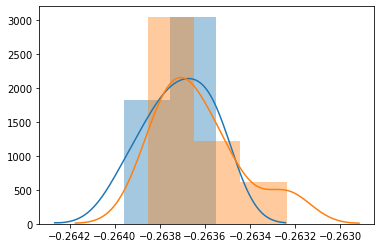

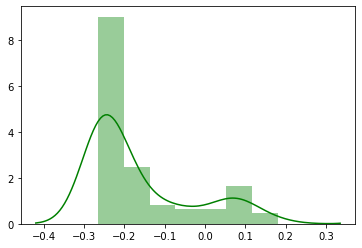

In [65]:
plt.figure()
sns.distplot(ox_scores, kde=True)
sns.distplot(noox_scores, kde=True)
plt.figure()
sns.distplot(healthy_scores, kde=True, color="green")

In [78]:
noox_scores

array([-0.26368854, -0.26385352, -0.26366193, -0.26357354, -0.26375947,
       -0.26376404, -0.26349355, -0.2632377 ])

In [79]:
ox_scores

array([-0.26355035, -0.26396023, -0.26378044, -0.2635996 , -0.26373286,
       -0.26385521, -0.2635555 , -0.26369566])

In [80]:
healthy_scores

array([ 0.05847029, -0.19531473, -0.26410787, -0.26417951, -0.25077268,
       -0.19527527, -0.26417423,  0.02122816, -0.08939782, -0.22414912,
       -0.0403374 ,  0.04829613, -0.14175594,  0.07603933,  0.07586958,
        0.10610133, -0.26417276, -0.25162278, -0.26423749, -0.26427994,
       -0.25158243, -0.26418569, -0.26410973, -0.25044206, -0.21138427,
       -0.26419973, -0.2642    , -0.22547546,  0.02636426, -0.26422473,
        0.03420084, -0.26422817, -0.11680068, -0.25113691, -0.25041871,
       -0.17101319, -0.26416934, -0.19755624, -0.25047505, -0.16831792,
       -0.25106992, -0.26412464, -0.26418762, -0.22398099, -0.26406712,
       -0.26423307,  0.17987444, -0.22393389, -0.18139118, -0.26412886,
        0.07597255, -0.19561839, -0.03704875, -0.25045237,  0.10521504,
       -0.25112451, -0.15585539, -0.22368705, -0.1866628 , -0.26404033,
       -0.26410054, -0.23701581, -0.25152583, -0.26424455, -0.0943258 ,
       -0.26414592, -0.23766526, -0.23760688, -0.25085288, -0.26

In [85]:
types

['healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'zero_meth_oxidation',
 'zero_meth_oxidation',
 'zero_meth_oxidation',
 'zero_meth_oxidation',
 'zero_meth_oxidation',
 'zero_meth_oxidation',
 'zero_meth_oxidation',
 'zero_meth_oxidation',
 'zero_meth_no_oxidation',
 'zero_meth_no_oxidation',
 'zero_meth_no_oxidation',
 'zero_meth_no_oxidation',
 'zero_meth_no_oxidation',
 'zero_meth_no_oxidation',
 'zero_meth_no_oxidation',
 'zero_meth_no_oxidation']

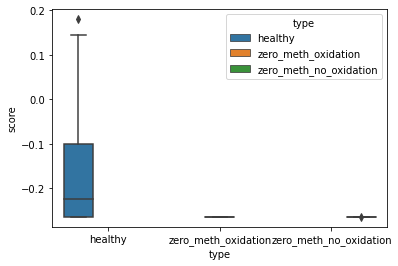

In [87]:
sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [88]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt0001/experiment/pt0001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-04/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 67)

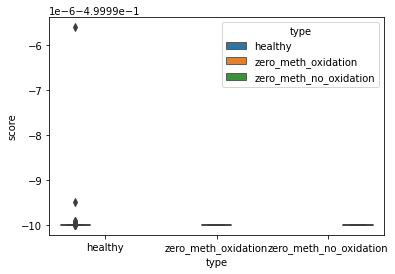

In [90]:
zero_samples_ox_bool = [x in ox_dsids for x in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"]]
zero_samples_noox_bool = [x in noox_dsids for x in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"]]
healthy_bool = [ x not in ox_dsids and x not in noox_dsids for x in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"]]

ox_scores = predictions.loc[zero_samples_ox_bool, "score"].values
noox_scores = predictions.loc[zero_samples_noox_bool, "score"].values
healthy_scores = predictions.loc[healthy_bool, "score"].values

types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [70]:
noox_scores

array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])

In [71]:
ox_scores

array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])

In [72]:
healthy_scores

array([-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.49999991, -0.5       ,
       -0.49999992, -0.5       , -0.5       , -0.49999999, -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.49999997, -0.4999956 , -0.5       ,
       -0.49999999, -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.49999999, -0.49999997, -0.5       ,
       -0.5       , -0.5       , -0.4999995 , -0.5       , -0.5       ,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.49999998,
       -0.5       , -0.5       , -0.5       , -0.5       , -0.49

In [91]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt001/experiment/pt001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-03/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 67)

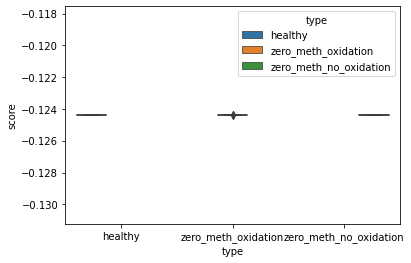

In [92]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [93]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt01/experiment/pt01/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-02/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 67)

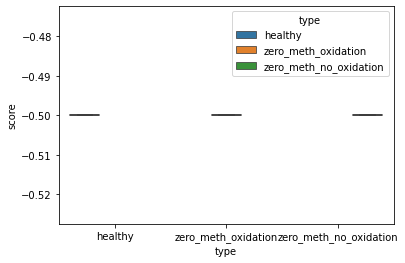

In [94]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [96]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt1/experiment/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-01/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 67)

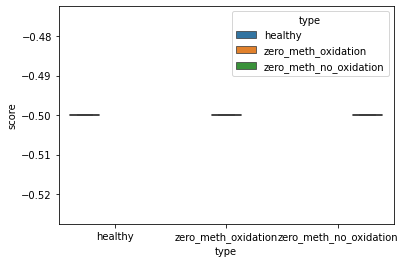

In [97]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [99]:
from pineapple.contrib.loaders.experiment_loader import ExperimentLoader
import numpy as np

bucket = "freenome-user-data-bgould"
path = "experiment/pt00001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-05"


loader = ExperimentLoader.from_path(bucket, path)


----------------------------------------------------------------------------------------------------
EXPERIMENT LOADER
----------------------------------------------------------------------------------------------------
Train Experiment: gs://freenome-user-data-bgould/experiment/pt00001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-05
Inference Experiment: gs:/None/None


In [105]:
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer

In [106]:
num_features = np.sum(transformer.features_to_keep)
print(num_features)

196


In [107]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-01"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)


----------------------------------------------------------------------------------------------------
EXPERIMENT LOADER
----------------------------------------------------------------------------------------------------
Train Experiment: gs://freenome-user-data-bgould/experiment/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-01
Inference Experiment: gs:/None/None


704


In [108]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt0001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-04"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)


----------------------------------------------------------------------------------------------------
EXPERIMENT LOADER
----------------------------------------------------------------------------------------------------
Train Experiment: gs://freenome-user-data-bgould/experiment/pt0001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-04
Inference Experiment: gs:/None/None


683


In [109]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-03"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)


----------------------------------------------------------------------------------------------------
EXPERIMENT LOADER
----------------------------------------------------------------------------------------------------
Train Experiment: gs://freenome-user-data-bgould/experiment/pt001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-03
Inference Experiment: gs:/None/None


704


In [110]:
bucket = "freenome-user-data-bgould"
path = "experiment/pt01/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-02"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)


----------------------------------------------------------------------------------------------------
EXPERIMENT LOADER
----------------------------------------------------------------------------------------------------
Train Experiment: gs://freenome-user-data-bgould/experiment/pt01/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-02
Inference Experiment: gs:/None/None


704


In [58]:
from pineapple.contrib.components.data_factories.matrix_factory import MatrixFactory as mf
from pineapple.core import experiment_context
import datetime
experiment_context.reset_context(0, "x", "x", datetime.datetime(2020, 9, 17,0,0))
import numpy as np

In [25]:
tcs = ["colorectal_healthy_temseqV3_fuzzy_rnd_pooled_plasma_v1",
       "colorectal_healthy_pool_temseqV3_zero_methylation_oxidation",
      "colorectal_healthy_pool_temseqV3_zero_methylation_no_oxidation"]

mat = mf.create_from_training_classes(tcs, "hmcfc_methyl_v3_automatic_regions_20200512/v1", [0,0,0] )

MATRIX: 2 duplicate sample ids found!


In [26]:
df_mat = (mat.x[:,:,2,0]/mat.x[:,:,2,1])

types = []
for dsid in mat.dataset_ids:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")

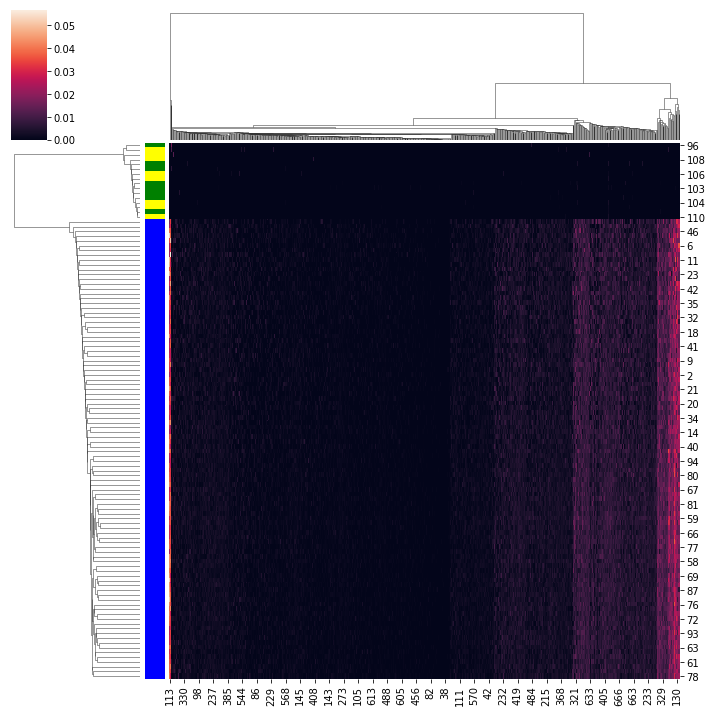

In [27]:
type_to_col = {"zero_meth_oxidation":"green", "zero_meth_no_oxidation":"yellow","healthy":"blue"}
row_cols = [ type_to_col[x] for x in types]

sns.clustermap(df_mat,
              row_colors=row_cols)

Text(0.5, 1.0, 'Average HMF rate 0% methyl samples')

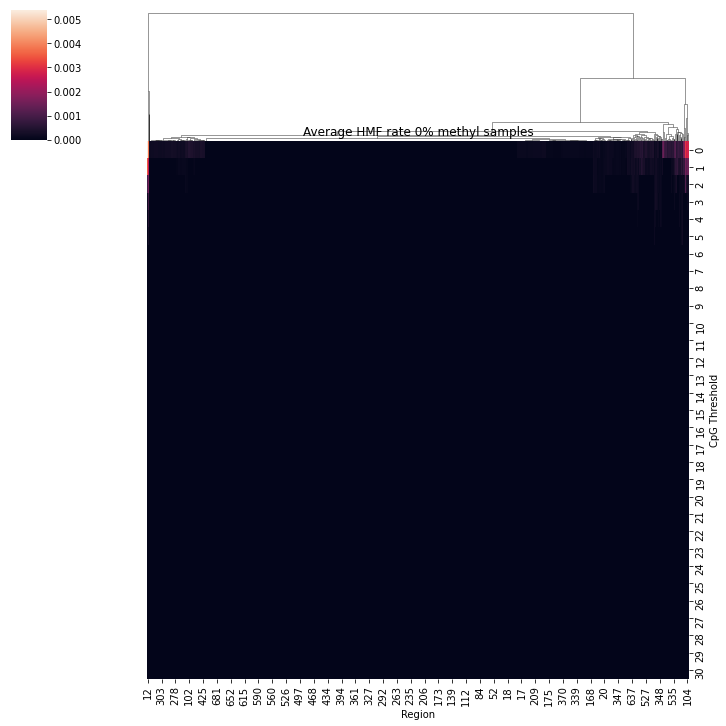

In [30]:
mat_0 = mat[[x in ox_dsids or x in noox_dsids for x in mat.dataset_ids]]

averages_0 = mat_0.x.mean(axis=0)
#averages.shape
hmf_rate_0 = averages_0[:,:,0]/averages_0[:,:,1] 
#hmf_rate.shape
hmf_rate_0 = np.nan_to_num(hmf_rate_0, 0)


g=sns.clustermap(hmf_rate_0.T,
              row_cluster=False)
g.ax_heatmap.set_ylabel("CpG Threshold")
g.ax_heatmap.set_xlabel("Region")
g.ax_heatmap.set_title("Average HMF rate 0% methyl samples")

MATRIX: 2 duplicate sample ids found!


Text(0.5, 1.0, 'Average HMF rate healthy samples')

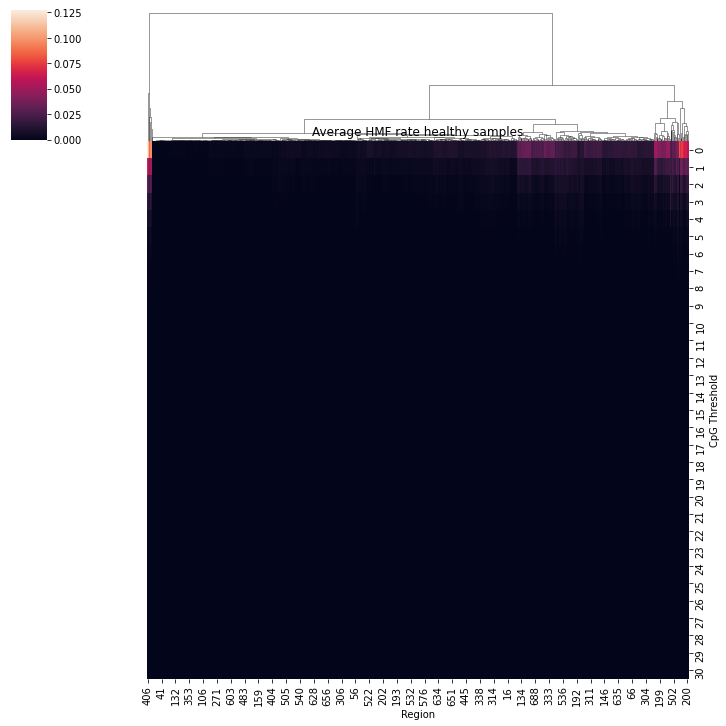

In [32]:
mat_h = mat[[x not in ox_dsids and x not in noox_dsids for x in mat.dataset_ids]]

averages_h = mat_h.x.mean(axis=0)
#averages.shape
hmf_rate_h = averages_h[:,:,0]/averages_h[:,:,1] 
#hmf_rate.shape
hmf_rate_h = np.nan_to_num(hmf_rate_h, 0)


g=sns.clustermap(hmf_rate_h.T,
              row_cluster=False)
g.ax_heatmap.set_ylabel("CpG Threshold")
g.ax_heatmap.set_xlabel("Region")
g.ax_heatmap.set_title("Average HMF rate healthy samples")

(704, 31)


Text(0.5, 1.0, 'Ratio of zero methylated to healthy')

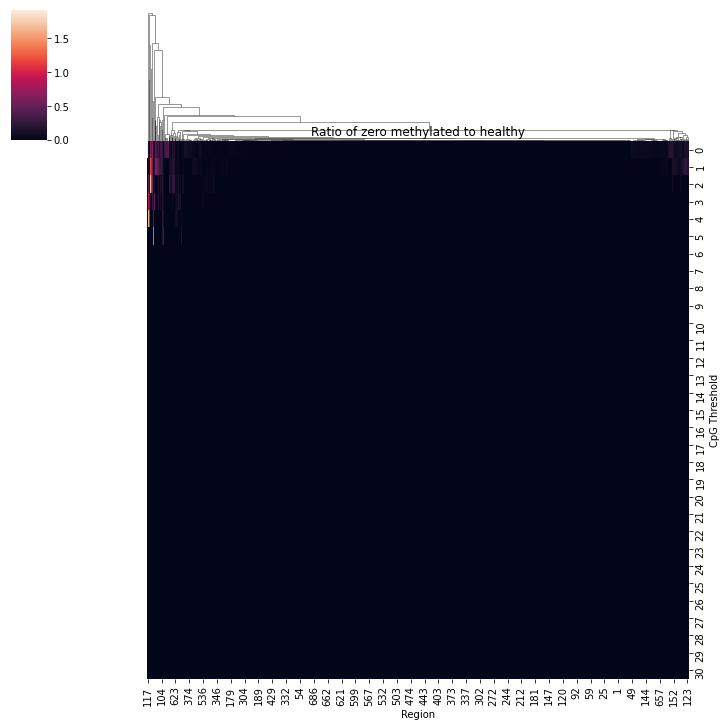

In [33]:
ratio = hmf_rate_0/hmf_rate_h
print(ratio.shape)


np.nan_to_num(ratio, 0)
g = sns.clustermap(ratio.T,
              row_cluster=False)
g.ax_heatmap.set_ylabel("CpG Threshold")
g.ax_heatmap.set_xlabel("Region")
g.ax_heatmap.set_title("Ratio of zero methylated to healthy")

In [36]:
np.argmax(ratio.T[1,:])
mat.column_metadata[426]

{'seqname': 'chr3',
 'start': 16512731,
 'end': 16513578,
 'n_cpg': 65,
 'name': 'RFTN1',
 'score': 26.946988732401337,
 'setting': 11,
 'n_cpg_ind': 65,
 'scaled_score': 159.23220614600788,
 'length': 847}

In [22]:
# A noisy region #130
mat.column_metadata[130]


{'seqname': 'chr11',
 'start': 82732367,
 'end': 82732709,
 'n_cpg': 36,
 'name': 'FAM181B',
 'score': 14.885658527757117,
 'setting': 20,
 'n_cpg_ind': 36,
 'scaled_score': 26.79418534996281,
 'length': 342}

In [43]:
mat.dataset_ids

array(['SD-0000BB6B', 'SD-0000BBA0', 'SD-0000BBA5', 'SD-0000BBA6',
       'SD-0000BBA7', 'SD-0000BBA8', 'SD-0000BBAA', 'SD-0000BBAB',
       'SD-0000BBAC', 'SD-0000BBAE', 'SD-0000BBB2', 'SD-0000BBB3',
       'SD-0000BBB4', 'SD-0000BBB5', 'SD-0000BBB9', 'SD-0000BBBA',
       'SD-0000BBBE', 'SD-0000BBBF', 'SD-0000BBC1', 'SD-0000BBC2',
       'SD-0000BBC3', 'SD-0000BBC5', 'SD-0000BB99', 'SD-0000BB94',
       'SD-0000BBB1', 'SD-0000BB92', 'SD-0000BB93', 'SD-0000BB6C',
       'SD-0000BB6D', 'SD-0000BB6E', 'SD-0000BB6F', 'SD-0000BB70',
       'SD-0000BB71', 'SD-0000BB74', 'SD-0000BB75', 'SD-0000BB76',
       'SD-0000BB79', 'SD-0000BB73', 'SD-0000BB8F', 'SD-0000BB7E',
       'SD-0000BB80', 'SD-0000BB81', 'SD-0000BB83', 'SD-0000BB85',
       'SD-0000BB87', 'SD-0000BB89', 'SD-0000BB8D', 'SD-0000BB7C',
       'SD-0000BC61', 'SD-0000BC5F', 'SD-0000BC5E', 'SD-0000BC59',
       'SD-0000BC4F', 'SD-0000BC53', 'SD-0000BC52', 'SD-0000BC51',
       'SD-0000BC62', 'SD-0000BC57', 'SD-0000BC66', 'SD-0000BC

In [44]:
mat.row_metadata[mat.dataset_ids=="SD-0000BB6B"][0].__dict__
# gs://seq-data-us-1/bam/191203_A00231_0359_AHFMTHDMXX/264a2ce8-b44a-5b91-990a-021099ce7545/S_89_I_185-185_TGAGACGA-TGAGACGA_S89.marked.bam

{'label': 0,
 'dataset': CalzoneDatasetMetadata(raw_dataset_metadata={'dataset': {'sample_id': 66173, 'id': 'SD-0000BB6B', 'raw_data_path': 'gs://seq-data-us-1/bam/191203_A00231_0359_AHFMTHDMXX/264a2ce8-b44a-5b91-990a-021099ce7545/S_89_I_185-185_TGAGACGA-TGAGACGA_S89.marked.bam', 'assay': 'TEM-Seq', 'assay_version': 1, 'analyte': 'cfDNA', 'creation_datetime': datetime.datetime(2020, 5, 4, 20, 10, 41, tzinfo=<UTC>), 'cr_assay_metadata': 'methyl_dataset_metadata', 'passed_latest_qc': True, 'metadata_dump': '{"bait_set": "methyl_panel_v3"}', 'collection_tube_type': None, 'tube_id': None}, 'lims_batch': {'name': 'TEMS-E2E-B4', 'id': 479, 'assay': None, 'assay_version': None, 'analyte': None}, 'sequencing': {'plate_position': 89, 's2_s4': 's2', 'sequencing_id': 'S_89_I_185-185_TGAGACGA-TGAGACGA_S89', 'flowcells': 'A00231_AHFMTHDMXX', 'scrubbed_flowcells': 'HFMTHDMXX', 'bam_id': '191203_A00231_0359_AHFMTHDMXX_S_89_I_185-185_TGAGACGA-TGAGACGA_S89', 'median_sequencing_date': datetime.datetime(

# Model Runs with poisson outlier v2

In [96]:
bucket = "freenome-user-data-bgould"
path = "experiment2/pt1/experiment2/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-01/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 67)

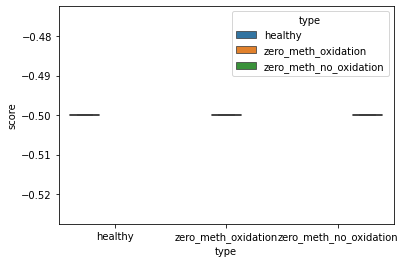

In [97]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [100]:
bucket = "freenome-user-data-bgould"
path = "experiment2/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-01"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)


----------------------------------------------------------------------------------------------------
EXPERIMENT LOADER
----------------------------------------------------------------------------------------------------
Train Experiment: gs://freenome-user-data-bgould/experiment2/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-01
Inference Experiment: gs:/None/None


704


In [101]:
bucket = "freenome-user-data-bgould"
path = "experiment2/p01/experiment2/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-02/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

Missed Redis cache for 112 datasets with timestamp 2020-09-23 00:00:00, reading from BigQuery instead
MATRIX: 2 duplicate sample ids found!


(112, 67)

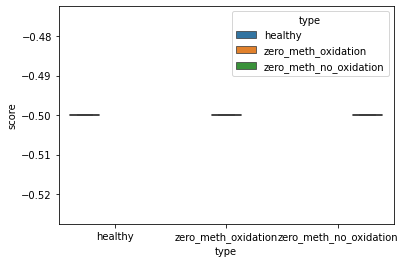

In [102]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [103]:
bucket = "freenome-user-data-bgould"
path = "experiment2/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-02"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)


----------------------------------------------------------------------------------------------------
EXPERIMENT LOADER
----------------------------------------------------------------------------------------------------
Train Experiment: gs://freenome-user-data-bgould/experiment2/pt1/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-02
Inference Experiment: gs:/None/None


704


In [10]:
bucket = "freenome-user-data-bgould"
path = "experiment2/p001/experiment2/p001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-03/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 62)

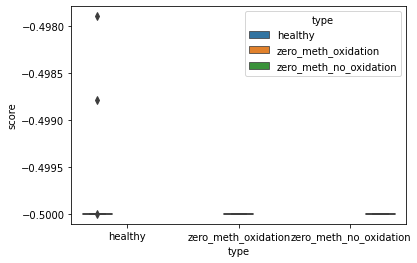

In [11]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [12]:
bucket = "freenome-user-data-bgould"
path = "experiment2/p001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-03"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)

704


In [13]:
bucket = "freenome-user-data-bgould"
path = "experiment2/p0001/experiment2/p0001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-04/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

MATRIX: 2 duplicate sample ids found!


(112, 62)

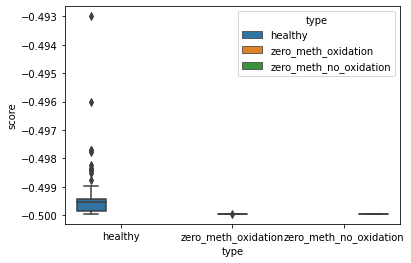

In [14]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [15]:
bucket = "freenome-user-data-bgould"
path = "experiment2/p0001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-04"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)

683


In [18]:
bucket = "freenome-user-data-bgould"
path = "experiment2/p00001/experiment2/p00001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-05/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

Missed Redis cache for 53 datasets with timestamp 2020-09-24 21:31:35.613571+00:00, reading from BigQuery instead
MATRIX: 2 duplicate sample ids found!


(112, 62)

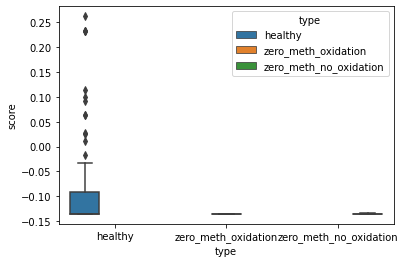

In [20]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [22]:
bucket = "freenome-user-data-bgould"
path = "experiment2/p00001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-05"

loader = ExperimentLoader.from_path(bucket, path)
transformer = loader.fold('metadata_balanced_kfold_stage_0').feature('hmcfc_methyl_v3_automatic_regions_20200512/v1').transformer('1_choose_settings_and_regions_for_poisson_v2').fitted_transformer
num_features = np.sum(transformer.features_to_keep)
print(num_features)

196


In [5]:
bucket = "freenome-user-data-bgould"
path = "experiment3/pt0001/experiment3/pt0001/hmcfc_methyl_v3_automatic_regions_20200512_hmfc_1e-04/fold_pred_voting"
predictions = InferenceResultWithMetadataLoader(bucket=bucket,path=path).load_result_dataframe()
predictions.shape

Missed Redis cache for 112 datasets with timestamp 2020-09-23 00:00:00, reading from BigQuery instead
MATRIX: 2 duplicate sample ids found!


(112, 62)

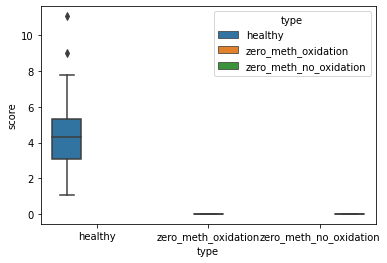

In [6]:
types = []
for dsid in predictions["dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1"].values:
    if dsid in ox_dsids:
        types.append("zero_meth_oxidation")
    elif dsid in noox_dsids:
        types.append("zero_meth_no_oxidation")
    else:
        types.append("healthy")
        
predictions["type"] = types

sns.boxplot(data=predictions, y="score", x="type", hue="type")

In [15]:
list(predictions.columns)

['sample_metadata.sex',
 'sample_metadata.age_at_blood_draw',
 'sample_metadata.site_name',
 'sample_metadata.ethnicity_simple',
 'sample_metadata.fit_result',
 'sample_metadata.stage',
 'sample_metadata.lesion_location',
 'sample_metadata.tumor_size_mm',
 'sample_metadata.num_adenomas',
 'sample_metadata.cancer_type',
 'sample_metadata.pathologic_type',
 'sample_metadata.pathologic_sub_type',
 'sample_metadata.tnm_t_tumor_extent',
 'sample_metadata.tnm_n_lymph_node_pos',
 'sample_metadata.tnm_m_distant_metastases',
 'sample_metadata.blood_draw_relative_to_tx',
 'sample_metadata.secondary_id',
 'sample_metadata.subj_hist_diverticular',
 'sample_metadata.subj_hist_cirrhosis',
 'sample_metadata.subj_hist_celiac',
 'sample_metadata.subj_hist_experi_enroll',
 'sample_metadata.subj_hist_experi_detail',
 'sample_metadata.subj_hist_week_days_active',
 'sample_metadata.subj_hist_day_mins_active',
 'sample_metadata.subj_hist_night_hours_sleep',
 'sample_metadata.subj_hist_worry',
 'sample_metadata.subj_hist_day_bms',
 'sample_metadata.subst_use_tobacco',
 'sample_metadata.subst_use_tobacco_quit_date',
 'sample_metadata.subst_use_tobacco_amount',
 'sample_metadata.subst_use_tobacco_years',
 'sample_metadata.subst_use_alcohol',
 'sample_metadata.subst_use_alcohol_quit_date',
 'sample_metadata.subst_use_alcohol_amount',
 'sample_metadata.subst_use_illicit_drug',
 'sample_metadata.subst_use_illicit_drug_quit_date',
 'sample_metadata.subst_use_illicit_drug_amount',
 'sample_metadata.colnosc_eval_full',
 'sample_metadata.colnosc_eval_left',
 'sample_metadata.colnosc_eval_trans',
 'sample_metadata.colnosc_eval_right',
 'sample_metadata.colnosc_elapsed_time',
 'sample_metadata.colnosc_histol_alter',
 'sample_metadata.colnosc_total_lesions',
 'sample_metadata.histol_pathog_init',
 'sample_metadata.hd_singular_confounder_fit_result',
 'sample_metadata.hd_colonoscopy_findings',
 'sample_metadata.hd_blood_sampling',
 'sample_metadata.hd_medical_history',
 'sample_metadata.hd_concomitant_medications',
 'sample_metadata.hd_protocol_deviation',
 'sample_metadata.hd_adenomatous_polyps',
 'sample_metadata.hd_hyperplastic_polyps',
 'sample_metadata.hd_colorectal_cancer',
 'sample_metadata.bmi',
 'olink_targeted_panel.study_num',
 'scrubbed_flowcells',
 'sample_id',
 'score',
 'dataset_id_hmcfc_methyl_v3_automatic_regions_20200512/v1',
 'prediction',
 'y',
 'type']

In [19]:
predictions2 = predictions.loc[:,["sample_id","type","score"]]
with open("./plot_data.csv", "w") as fout:
    predictions2.to_csv(fout)

In [20]:
!head plot_data.csv

,sample_id,type,score
0,66173,healthy,3.8032062970222977
1,66173,healthy,5.382871337410166
2,66173,healthy,1.061736550076004
3,66173,healthy,2.8489524564300606
4,66173,healthy,1.7900670698304446
5,66173,healthy,2.4356568741842386
6,66173,healthy,3.959000311664143
7,66173,healthy,4.433368762367544
8,66173,healthy,5.085857245815988
